In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [17]:
burn = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_sparsity_burnup.csv')
rxtr = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_sparsity_reactor.csv')

In [18]:
burn.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
rxtr.loc[:, 'Parameter'] = 'Reactor Type'

In [23]:
#rxtr.loc[rxtr['Algorithm']=='knn', :]
burn.head()

,Unnamed: 0,fit_time,score_time,test_explained_variance,test_neg_mean_absolute_error,Algorithm,Sparsity,Parameter
0,0,0.668047,10.705625,0.994793,-726.677821,knn,0.002534,Burnup [MWd/MTU]
1,1,0.697256,10.863982,0.994697,-720.607252,knn,0.002534,Burnup [MWd/MTU]
2,2,0.716420,10.746095,0.994807,-707.114478,knn,0.002534,Burnup [MWd/MTU]
3,3,0.738710,10.881542,0.995163,-706.561864,knn,0.002534,Burnup [MWd/MTU]
4,4,0.409963,5.637017,0.995381,-677.303996,knn,0.002534,Burnup [MWd/MTU]


# Sparsity Curves By Prediction Type

In [44]:
sns.set(style="ticks", font_scale=1.2)

/home/opy/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


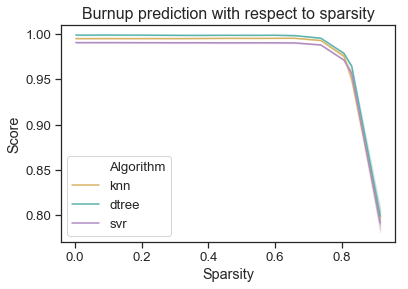

In [52]:
plt.clf()
sp = sns.lineplot(x = 'Sparsity', y='test_explained_variance', hue='Algorithm', 
                  data=burn, err_style='band', 
                  palette=sns.color_palette(med))
sp.set_ylabel('Score')
plt.title('Burnup prediction with respect to sparsity', fontsize=16)
plt.show()

fig = sp.get_figure()
fig.savefig('../results/4oct2018/graphs/burn_sparsity.png', bbox_inches='tight', transparent=True)

In [36]:

   #.set(ylim=(0.5, 1.03))
#plt.subplots_adjust(top=.8)



/home/opy/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


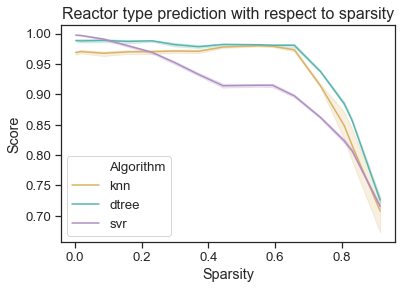

In [53]:
plt.clf()
sp = sns.lineplot(x = 'Sparsity', y='test_accuracy', hue='Algorithm', 
                  data=rxtr, err_style='band', 
                  palette=sns.color_palette(med))

sp.set_ylabel('Score')
plt.title('Reactor type prediction with respect to sparsity', fontsize=16)
plt.show()

fig = sp.get_figure()
fig.savefig('../results/4oct2018/graphs/rxtr_sparsity.png', bbox_inches='tight', transparent=True)

In [242]:
def plot_sparsity_curve(df, title, fig, ax):
    
    sparsity = df['Sparsity']
    train_scores_mean = df['TrainScore']
    train_scores_std = df['TrainStd']
    test_scores_mean = df['CV-Score']
    test_scores_std = df['CV-Std']
    
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Sparsity', fontsize=14)
    # for burnup
    #ax.set_xlim(250, 5000)
    # for everything else
    ax.set_xlim(1000, 12100)
    ax.tick_params(labelsize=14)
    
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color = med[0], 
                     alpha=0.2)
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color = med[1], 
                     alpha=0.2)
    ax.plot(train_sizes, train_scores_mean, 'o-', color=med[0], mew=0, ms=5, 
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color=med[1], mew=0, ms=5,
             label="Cross-validation score")
    
    # Double x axis
    #ax2 = ax.twiny()
    #ax2.set_xlim(ax.get_xlim())
    #ax2.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
    #ax2.set_xticklabels(train_frac)
    #ax2.set_xlabel('Fraction of Training Set', fontsize=12)
    
    return fig

In [233]:
def plot_by_prediction(df):
    fig, alg_ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(17, 5))
    knn = ['knn', 'k-Nearest Neighbors', alg_ax[0]]
    dtree = ['dtree', 'Decision Trees', alg_ax[1]]
    svr = ['svr', 'Support Vectors', alg_ax[2]]
    for alg, title, ax in [knn, dtree, svr]:
        lc = df.loc[(df['Algorithm']==alg)]
        plot_learning_curve(lc, title, fig, ax)
        
    alg_ax[0].set_ylabel('Score', fontsize=16)
    ax.set_ylim(0.88, 1.005)
    parameter = df.loc[0, 'Parameter']
    title = 'Learning Curves using Three Algorithms: ' + parameter + ' Prediction'
    fig.suptitle(title, fontsize=24)
    fig.subplots_adjust(top=.8)
    alg_ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.23), ncol=2)
    fig.show()
    return fig

In [243]:
plt.close(fig)

## Reactor Type

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


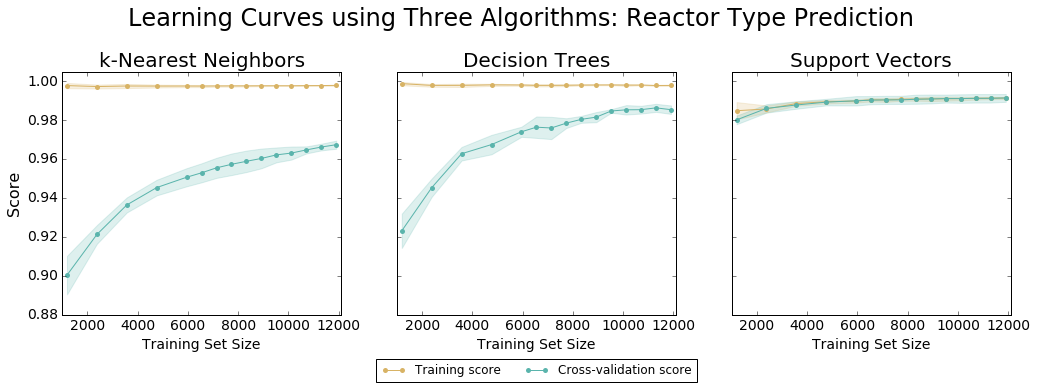

In [244]:
fig = plot_by_prediction(rxtr_lc)
fig.savefig('../results/4oct2018/graphs/rxtr_learning.png', bbox_inches='tight', transparent=True)

## Burnup

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


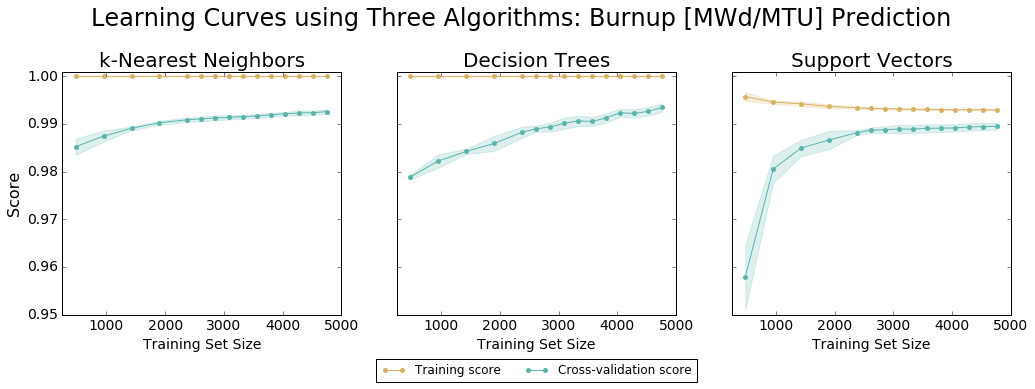

In [223]:
plt.close(fig)
fig = plot_by_prediction(burn_lc)
fig.savefig('../results/4oct2018/graphs/burn_learning.png', bbox_inches='tight', transparent=True)

## Enrichment

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


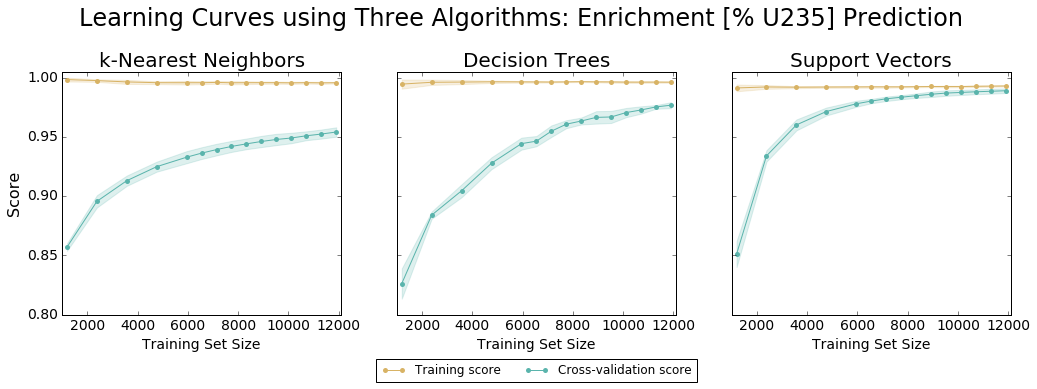

In [231]:
plt.close(fig)
fig = plot_by_prediction(enri_lc)
fig.savefig('../results/4oct2018/graphs/enri_learning.png', bbox_inches='tight', transparent=True)

## Cooling Time

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


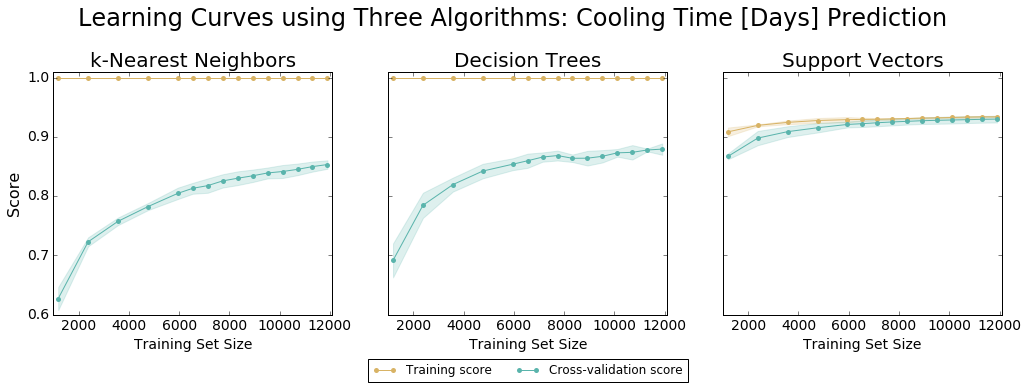

In [210]:
plt.close(fig)
fig = plot_by_prediction(cool_lc)
fig.savefig('../results/4oct2018/graphs/cool_learning.png', bbox_inches='tight', transparent=True)